In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import requests
from PIL import Image
from IPython.display import display
from sklearn.preprocessing import LabelEncoder

# Importing data

In [70]:
df = pd.read_csv('thyroid_dataset.csv')


In [71]:
df.head()

,Age,Sex,Cold,Depression,pregnant,thyroid surgery,puffy face,Dry skin,Hypopituitary Disease,psych,...,sudden weight loss,Fatigue,sleep issues,swelling,bulging of eyes,anemia,confusion,Cold.1,Rapid heart beat,class
0,41.0,F,f,f,f,f,f,f,f,f,...,No,Yes,No,No,Yes,No,No,Yes,Yes,Positive
1,23.0,F,f,f,f,f,f,f,f,f,...,No,Yes,No,Yes,No,No,Yes,No,Yes,Positive
2,46.0,M,f,f,f,f,f,f,f,f,...,No,Yes,No,No,Yes,No,No,Yes,Yes,Positive
3,70.0,F,f,f,f,f,f,f,f,f,...,Yes,Yes,Yes,No,Yes,No,No,No,No,Positive
4,70.0,F,f,f,f,f,f,f,f,f,...,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Positive


# Exploratory Data Analysis

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   3771 non-null   float64
 1   Sex                                   3622 non-null   object 
 2   Cold                                  3772 non-null   object 
 3   Depression                            3772 non-null   object 
 4   pregnant                              3772 non-null   object 
 5   thyroid surgery                       3772 non-null   object 
 6   puffy face                            3772 non-null   object 
 7   Dry skin                              3772 non-null   object 
 8   Hypopituitary Disease                 3772 non-null   object 
 9   psych                                 3772 non-null   object 
 10  Sudden weight gain                    3772 non-null   object 
 11  Muscle weakness/t

## Checking for missing values

In [73]:
#printing null values in each column
counts = df.isna().sum()
print(counts.sort_values())

Enlarged thyroid gland                    0
Cold.1                                    0
confusion                                 0
anemia                                    0
bulging of eyes                           0
swelling                                  0
sleep issues                              0
Fatigue                                   0
sudden weight loss                        0
referral source                           0
Nervousness/Anxiety/Irritability          0
Sweating                                  0
class                                     0
Muscle weakness/tenderness/stiffness      0
Sudden weight gain                        0
psych                                     0
Hypopituitary Disease                     0
Dry skin                                  0
puffy face                                0
thyroid surgery                           0
pregnant                                  0
Depression                                0
Cold                            

In [74]:
print(df.nunique())

Age                                     93
Sex                                      2
Cold                                     2
Depression                               2
pregnant                                 2
thyroid surgery                          2
puffy face                               2
Dry skin                                 2
Hypopituitary Disease                    2
psych                                    2
Sudden weight gain                       2
Muscle weakness/tenderness/stiffness     2
Enlarged thyroid gland                   2
Sweating                                 2
Nervousness/Anxiety/Irritability         1
referral source                          5
sudden weight loss                       2
Fatigue                                  2
sleep issues                             2
swelling                                 2
bulging of eyes                          2
anemia                                   2
confusion                                2
Cold.1     

In [75]:
#removing referral source column:
df = df.drop(['referral source'], axis = 1)
df = df.drop(['Cold.1'], axis = 1)

In [76]:
print(df.nunique())

Age                                     93
Sex                                      2
Cold                                     2
Depression                               2
pregnant                                 2
thyroid surgery                          2
puffy face                               2
Dry skin                                 2
Hypopituitary Disease                    2
psych                                    2
Sudden weight gain                       2
Muscle weakness/tenderness/stiffness     2
Enlarged thyroid gland                   2
Sweating                                 2
Nervousness/Anxiety/Irritability         1
sudden weight loss                       2
Fatigue                                  2
sleep issues                             2
swelling                                 2
bulging of eyes                          2
anemia                                   2
confusion                                2
Rapid heart beat                         2
class      

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   3771 non-null   float64
 1   Sex                                   3622 non-null   object 
 2   Cold                                  3772 non-null   object 
 3   Depression                            3772 non-null   object 
 4   pregnant                              3772 non-null   object 
 5   thyroid surgery                       3772 non-null   object 
 6   puffy face                            3772 non-null   object 
 7   Dry skin                              3772 non-null   object 
 8   Hypopituitary Disease                 3772 non-null   object 
 9   psych                                 3772 non-null   object 
 10  Sudden weight gain                    3772 non-null   object 
 11  Muscle weakness/t

In [78]:
#printing null values in each column
counts = df.isna().sum()
print(counts.sort_values())

Muscle weakness/tenderness/stiffness      0
confusion                                 0
anemia                                    0
bulging of eyes                           0
swelling                                  0
sleep issues                              0
Fatigue                                   0
sudden weight loss                        0
Nervousness/Anxiety/Irritability          0
Sweating                                  0
Enlarged thyroid gland                    0
class                                     0
Sudden weight gain                        0
psych                                     0
Hypopituitary Disease                     0
Dry skin                                  0
puffy face                                0
thyroid surgery                           0
pregnant                                  0
Depression                                0
Cold                                      0
Rapid heart beat                          0
Age                             

In [79]:
#dropping rows with null values
df = df.dropna()

In [80]:
#printing null values in each column
counts = df.isna().sum()
print(counts.sort_values())

Age                                     0
confusion                               0
anemia                                  0
bulging of eyes                         0
swelling                                0
sleep issues                            0
Fatigue                                 0
sudden weight loss                      0
Nervousness/Anxiety/Irritability        0
Sweating                                0
Enlarged thyroid gland                  0
Muscle weakness/tenderness/stiffness    0
Sudden weight gain                      0
psych                                   0
Hypopituitary Disease                   0
Dry skin                                0
puffy face                              0
thyroid surgery                         0
pregnant                                0
Depression                              0
Cold                                    0
Sex                                     0
Rapid heart beat                        0
class                             

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3621 entries, 0 to 3771
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   3621 non-null   float64
 1   Sex                                   3621 non-null   object 
 2   Cold                                  3621 non-null   object 
 3   Depression                            3621 non-null   object 
 4   pregnant                              3621 non-null   object 
 5   thyroid surgery                       3621 non-null   object 
 6   puffy face                            3621 non-null   object 
 7   Dry skin                              3621 non-null   object 
 8   Hypopituitary Disease                 3621 non-null   object 
 9   psych                                 3621 non-null   object 
 10  Sudden weight gain                    3621 non-null   object 
 11  Muscle weakness/t

In [82]:
#some numerical values are type object. converting them to int or float
df_processed = df.apply(lambda col:pd.to_numeric(col, errors='ignore'))

In [83]:
df_processed.head()

,Age,Sex,Cold,Depression,pregnant,thyroid surgery,puffy face,Dry skin,Hypopituitary Disease,psych,...,Nervousness/Anxiety/Irritability,sudden weight loss,Fatigue,sleep issues,swelling,bulging of eyes,anemia,confusion,Rapid heart beat,class
0,41.0,F,f,f,f,f,f,f,f,f,...,f,No,Yes,No,No,Yes,No,No,Yes,Positive
1,23.0,F,f,f,f,f,f,f,f,f,...,f,No,Yes,No,Yes,No,No,Yes,Yes,Positive
2,46.0,M,f,f,f,f,f,f,f,f,...,f,No,Yes,No,No,Yes,No,No,Yes,Positive
3,70.0,F,f,f,f,f,f,f,f,f,...,f,Yes,Yes,Yes,No,Yes,No,No,No,Positive
4,70.0,F,f,f,f,f,f,f,f,f,...,f,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Positive


In [84]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3621 entries, 0 to 3771
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   3621 non-null   float64
 1   Sex                                   3621 non-null   object 
 2   Cold                                  3621 non-null   object 
 3   Depression                            3621 non-null   object 
 4   pregnant                              3621 non-null   object 
 5   thyroid surgery                       3621 non-null   object 
 6   puffy face                            3621 non-null   object 
 7   Dry skin                              3621 non-null   object 
 8   Hypopituitary Disease                 3621 non-null   object 
 9   psych                                 3621 non-null   object 
 10  Sudden weight gain                    3621 non-null   object 
 11  Muscle weakness/t

In [85]:
print(df_processed.nunique())

Age                                     93
Sex                                      2
Cold                                     2
Depression                               2
pregnant                                 2
thyroid surgery                          2
puffy face                               2
Dry skin                                 2
Hypopituitary Disease                    2
psych                                    2
Sudden weight gain                       2
Muscle weakness/tenderness/stiffness     2
Enlarged thyroid gland                   2
Sweating                                 2
Nervousness/Anxiety/Irritability         1
sudden weight loss                       2
Fatigue                                  2
sleep issues                             2
swelling                                 2
bulging of eyes                          2
anemia                                   2
confusion                                2
Rapid heart beat                         2
class      

In [86]:
num_cols = df_processed._get_numeric_data().columns


In [87]:
num_cols

Index(['Age'], dtype='object')

In [88]:
cols = df_processed.columns

In [89]:
cat_list = list(set(cols) - set(num_cols))

In [90]:
numeric_data = df_processed.select_dtypes(include=[np.number])
categorical_data = df_processed.select_dtypes(exclude=[np.number])

In [91]:
cat_list

['Enlarged thyroid gland',
 'Fatigue',
 'sleep issues',
 'puffy face',
 'Muscle weakness/tenderness/stiffness',
 'Nervousness/Anxiety/Irritability',
 'pregnant',
 'Sex',
 'bulging of eyes',
 'class',
 'Depression',
 'Hypopituitary Disease',
 'Rapid heart beat',
 'swelling',
 'Sudden weight gain',
 'psych',
 'Cold',
 'sudden weight loss',
 'anemia',
 'Dry skin',
 'confusion',
 'Sweating',
 'thyroid surgery']

In [92]:
numeric_data

,Age
0,41.0
1,23.0
2,46.0
3,70.0
4,70.0
...,...
3767,30.0
3768,68.0
3769,74.0
3770,72.0


In [93]:
categorical_data

,Sex,Cold,Depression,pregnant,thyroid surgery,puffy face,Dry skin,Hypopituitary Disease,psych,Sudden weight gain,...,Nervousness/Anxiety/Irritability,sudden weight loss,Fatigue,sleep issues,swelling,bulging of eyes,anemia,confusion,Rapid heart beat,class
0,F,f,f,f,f,f,f,f,f,t,...,f,No,Yes,No,No,Yes,No,No,Yes,Positive
1,F,f,f,f,f,f,f,f,f,t,...,f,No,Yes,No,Yes,No,No,Yes,Yes,Positive
2,M,f,f,f,f,f,f,f,f,t,...,f,No,Yes,No,No,Yes,No,No,Yes,Positive
3,F,f,f,f,f,f,f,f,f,t,...,f,Yes,Yes,Yes,No,Yes,No,No,No,Positive
4,F,f,f,f,f,f,f,f,f,t,...,f,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,F,f,f,f,f,f,f,f,f,f,...,f,No,Yes,No,No,Yes,Yes,No,Yes,Positive
3768,F,f,f,f,f,f,f,f,f,t,...,f,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
3769,F,f,f,f,f,f,f,f,f,t,...,f,Yes,Yes,No,No,Yes,No,Yes,Yes,Positive
3770,M,f,f,f,f,f,f,f,f,t,...,f,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Positive


In [94]:
#label encoding categorical data
categorical_data =categorical_data.apply(LabelEncoder().fit_transform)

In [95]:
categorical_data

,Sex,Cold,Depression,pregnant,thyroid surgery,puffy face,Dry skin,Hypopituitary Disease,psych,Sudden weight gain,...,Nervousness/Anxiety/Irritability,sudden weight loss,Fatigue,sleep issues,swelling,bulging of eyes,anemia,confusion,Rapid heart beat,class
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,1,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,1,1,1
2,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,1,1
3,0,0,0,0,0,0,0,0,0,1,...,0,1,1,1,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,1,1
3768,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,1,1,0,1,1
3769,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,1,0,1,1,1
3770,1,0,0,0,0,0,0,0,0,1,...,0,1,1,1,1,1,1,0,0,1


In [96]:
#combining encoded categorical dataset and numerical dataset
final_dataset = pd.concat([categorical_data,numeric_data],axis = 1)

In [97]:
final_dataset.head()

,Sex,Cold,Depression,pregnant,thyroid surgery,puffy face,Dry skin,Hypopituitary Disease,psych,Sudden weight gain,...,sudden weight loss,Fatigue,sleep issues,swelling,bulging of eyes,anemia,confusion,Rapid heart beat,class,Age
0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,1,1,41.0
1,0,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,1,1,1,23.0
2,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,1,1,46.0
3,0,0,0,0,0,0,0,0,0,1,...,1,1,1,0,1,0,0,0,1,70.0
4,0,0,0,0,0,0,0,0,0,1,...,1,1,0,1,1,1,1,1,1,70.0


In [98]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3621 entries, 0 to 3771
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Sex                                   3621 non-null   int32  
 1   Cold                                  3621 non-null   int32  
 2   Depression                            3621 non-null   int32  
 3   pregnant                              3621 non-null   int32  
 4   thyroid surgery                       3621 non-null   int32  
 5   puffy face                            3621 non-null   int32  
 6   Dry skin                              3621 non-null   int32  
 7   Hypopituitary Disease                 3621 non-null   int32  
 8   psych                                 3621 non-null   int32  
 9   Sudden weight gain                    3621 non-null   int32  
 10  Muscle weakness/tenderness/stiffness  3621 non-null   int32  
 11  Enlarged thyroid 

# Checking for the Balance of Data

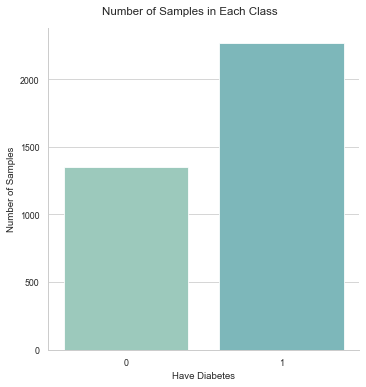

In [99]:
sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette('GnBu_d')
a = sns.catplot(x='class', data=final_dataset, kind='count')
a.fig.suptitle('Number of Samples in Each Class', y=1.03)
a.set(ylabel='Number of Samples', xlabel='Have Diabetes')
plt.show()

### Balancing the dataset using SMOTE - generating synthetic data points

In [100]:
from imblearn.over_sampling import SMOTE

In [101]:
X=final_dataset.drop('class', axis=1)
Y=final_dataset[['class']]

In [102]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

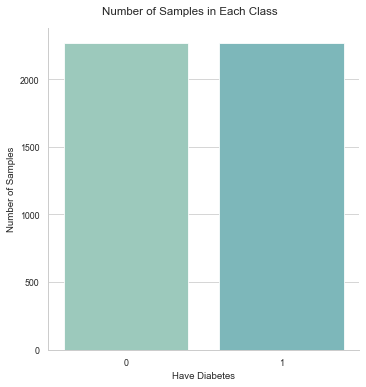

In [103]:
sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette('GnBu_d')
a = sns.catplot(x='class', data=Y, kind='count')
a.fig.suptitle('Number of Samples in Each Class', y=1.03)
a.set(ylabel='Number of Samples', xlabel='Have Diabetes')
plt.show()

# Splitting the data into test and train

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y, test_size=0.2)

In [106]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3630 entries, 3815 to 756
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Sex                                   3630 non-null   int32  
 1   Cold                                  3630 non-null   int32  
 2   Depression                            3630 non-null   int32  
 3   pregnant                              3630 non-null   int32  
 4   thyroid surgery                       3630 non-null   int32  
 5   puffy face                            3630 non-null   int32  
 6   Dry skin                              3630 non-null   int32  
 7   Hypopituitary Disease                 3630 non-null   int32  
 8   psych                                 3630 non-null   int32  
 9   Sudden weight gain                    3630 non-null   int32  
 10  Muscle weakness/tenderness/stiffness  3630 non-null   int32  
 11  Enlarged thyroi

In [107]:
Ytrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3630 entries, 3815 to 756
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   3630 non-null   int32
dtypes: int32(1)
memory usage: 42.5 KB


In [108]:
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 908 entries, 840 to 4339
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Sex                                   908 non-null    int32  
 1   Cold                                  908 non-null    int32  
 2   Depression                            908 non-null    int32  
 3   pregnant                              908 non-null    int32  
 4   thyroid surgery                       908 non-null    int32  
 5   puffy face                            908 non-null    int32  
 6   Dry skin                              908 non-null    int32  
 7   Hypopituitary Disease                 908 non-null    int32  
 8   psych                                 908 non-null    int32  
 9   Sudden weight gain                    908 non-null    int32  
 10  Muscle weakness/tenderness/stiffness  908 non-null    int32  
 11  Enlarged thyroid

In [109]:
Ytest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 908 entries, 840 to 4339
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   908 non-null    int32
dtypes: int32(1)
memory usage: 10.6 KB


# Building a Decision Tree Model

In [110]:
from sklearn.tree import  DecisionTreeClassifier

In [111]:
from sklearn.metrics import classification_report, confusion_matrix

In [112]:
#creating a model
model = DecisionTreeClassifier(criterion = 'entropy')

In [113]:
#fitting the model
model.fit(Xtrain,Ytrain)

DecisionTreeClassifier(criterion='entropy')

In [114]:
#predicting using the model and the train data
preds = model.predict(Xtrain)

In [115]:
# Accuracy = train
np.mean(Ytrain["class"] == preds) #training accuracy of 98.26%

0.9826446280991735

In [116]:
#predicting using the model and the validation data
preds1 = model.predict(Xtest)

In [117]:
# Accuracy = test
np.mean(Ytest["class"] == preds1) #test accuracy of 91.74%

0.9174008810572687

In [118]:
#precision and recall of the decision tree model
# print(confusion_matrix(Ytest, preds1))
print(classification_report(Ytest, preds1))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       438
           1       0.94      0.90      0.92       470

    accuracy                           0.92       908
   macro avg       0.92      0.92      0.92       908
weighted avg       0.92      0.92      0.92       908



### Saving the Decision Tree model as a pickle file in the project directory

In [119]:
import pickle

In [120]:
pickle.dump(model, open('model.pkl','wb'))